In [10]:
!pip install matplotlib numpy scikit-learn seaborn

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load the saved model
model = load_model("emotion_cnn.h5")

# Image size & batch
img_size = (48, 48)
batch_size = 64

# Set up test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    'test',
    target_size=img_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important to get labels aligned with predictions
)

# Evaluate model
loss, acc = model.evaluate(test_gen)
print(f"\nTest Accuracy: {acc:.4f}")



You should consider upgrading via the 'C:\Users\totst\OneDrive\Desktop\cnn\venv\Scripts\python.exe -m pip install --upgrade pip' command.


Found 7178 images belonging to 7 classes.
113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - accuracy: 0.5178 - loss: 1.3940

Test Accuracy: 0.5587


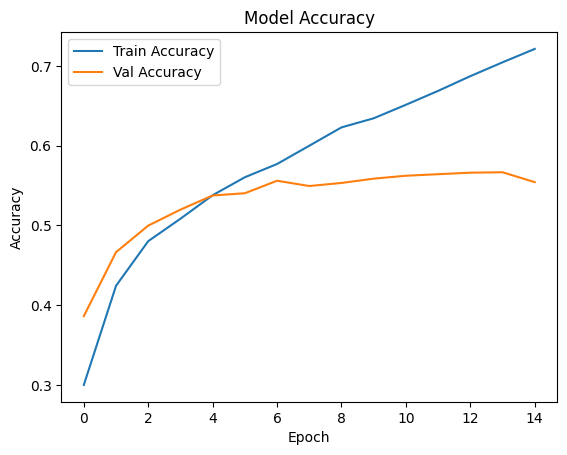

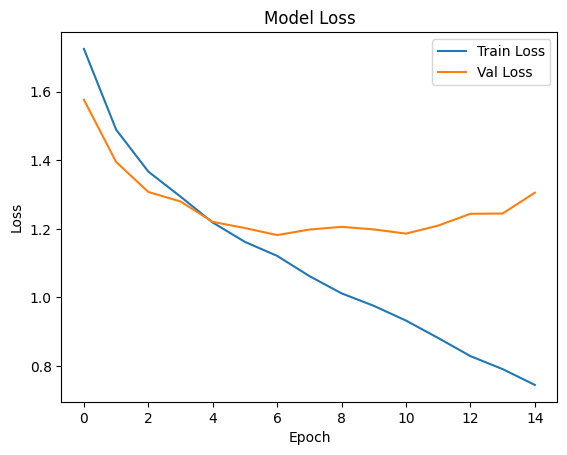

In [11]:
import pickle
import matplotlib.pyplot as plt

# Load history from file
with open('history.pkl', 'rb') as f:
    history = pickle.load(f)

# Plot accuracy
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step


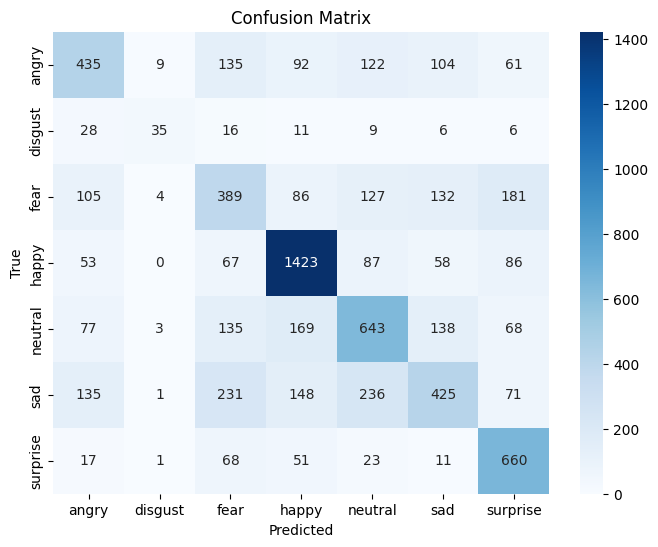

In [12]:
# Predict
pred_probs = model.predict(test_gen)
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(true_classes, pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [13]:
print(classification_report(true_classes, pred_classes, target_names=class_labels))


              precision    recall  f1-score   support

       angry       0.51      0.45      0.48       958
     disgust       0.66      0.32      0.43       111
        fear       0.37      0.38      0.38      1024
       happy       0.72      0.80      0.76      1774
     neutral       0.52      0.52      0.52      1233
         sad       0.49      0.34      0.40      1247
    surprise       0.58      0.79      0.67       831

    accuracy                           0.56      7178
   macro avg       0.55      0.52      0.52      7178
weighted avg       0.55      0.56      0.55      7178

